In [1]:
import pandas as pd
import numpy as np
import matplotlib

data = pd.DataFrame.from_csv('./dnc-temporalGraph/out.dnc-temporalGraph', sep = '\t', header = 0, index_col=None)
# % 28236 1574 1574
data = data.drop('weight', 1)
data.head()

,from,to,timestamp
0,419,465,1463507482
1,869,453,1462337903
2,943,1151,1463167636
3,943,217,1463167636
4,943,841,1463167636


In [2]:
n = np.max(data['to'])
ad_mat = np.zeros((n,n))
A = np.zeros((n,n))
for index, row in data.iterrows():
    A[row['from']-1, row['to']-1] = ad_mat[row['from']-1, row['to']-1] + 1
    ad_mat[row['from']-1, row['to']-1] = 1

In [3]:
import networkx as nx
G = nx.from_numpy_matrix(A,create_using=nx.DiGraph())
G.is_directed()

True

C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\hp\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


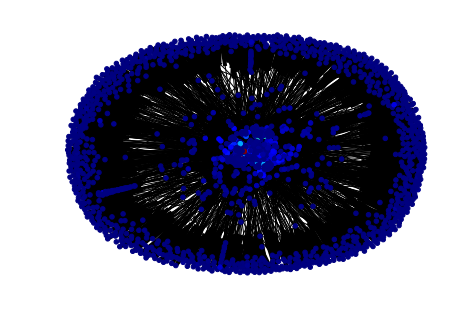

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline
pos = nx.spring_layout(G)
degree = G.degree()
nodes = G.nodes()
n_color = np.asarray([degree[n] for n in nodes])
nx.draw(G, pos, node_color=n_color, node_size=20, cmap=plt.cm.jet)
plt.show()

# 1. Page Rank

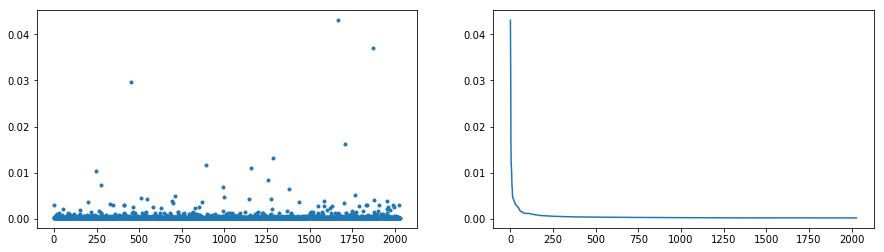

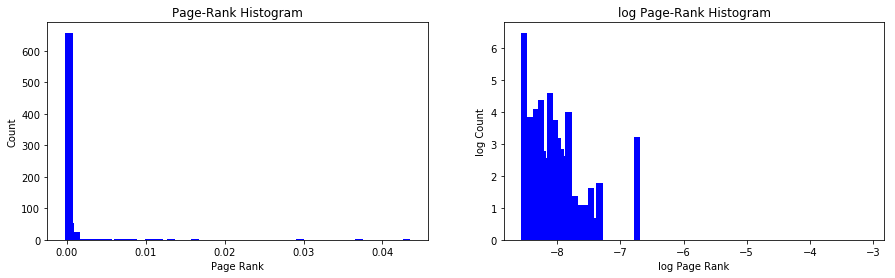

In [49]:
page_rank = nx.pagerank(G)
lists = sorted(page_rank.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x, y, '.')
plt.subplot(1,2,2)
plt.plot(y)
plt.show


h = {}
for node in page_rank:
    d = page_rank[node]
    if d in h:
        h[d] += 1
    else:
        h[d]=1

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(list(h.keys()), h.values(), width=0.001, color='b')
plt.title("Page-Rank Histogram")
plt.ylabel("Count")
plt.xlabel("Page Rank")

plt.subplot(1,2,2)
plt.bar(np.log(list(h.keys())), np.log(list(h.values())), width=0.1, color='b')
plt.title("log Page-Rank Histogram")
plt.ylabel("log Count")
plt.xlabel("log Page Rank")
plt.show()

# 2. Katz centrality

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in log


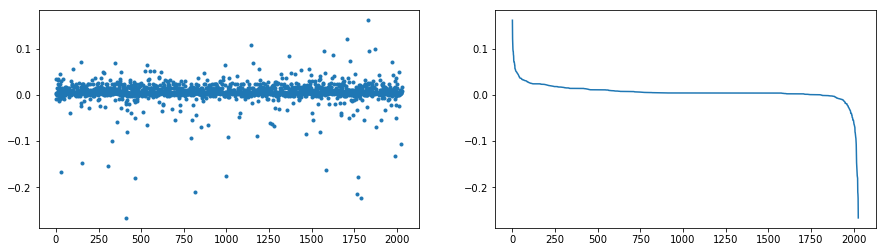

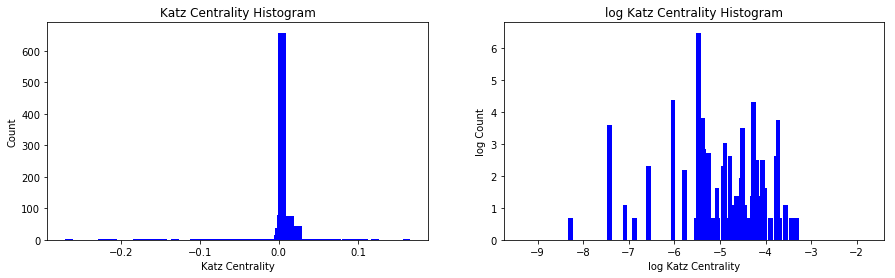

In [54]:
katz_cen = nx.katz_centrality_numpy(G)
lists = sorted(katz_cen.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x, y, '.')
plt.subplot(1,2,2)
plt.plot(y)
plt.show


h = {}
for node in katz_cen:
    d = katz_cen[node]
    if d in h:
        h[d] += 1
    else:
        h[d]=1

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(list(h.keys()), h.values(), width=0.01, color='b')
plt.title("Katz Centrality Histogram")
plt.ylabel("Count")
plt.xlabel("Katz Centrality")

plt.subplot(1,2,2)
plt.bar(np.log(list(h.keys())), np.log(list(h.values())), width=0.1, color='b')
plt.title("log Katz Centrality Histogram")
plt.ylabel("log Count")
plt.xlabel("log Katz Centrality")
plt.show()

# 3. Clustering

## 3.1 Triangles

Transitivity:  8.9 %


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\transforms.py:404: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


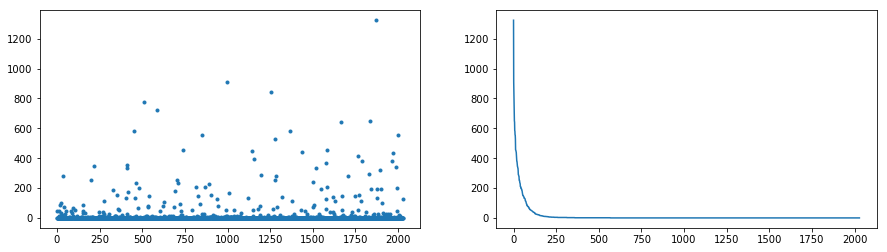

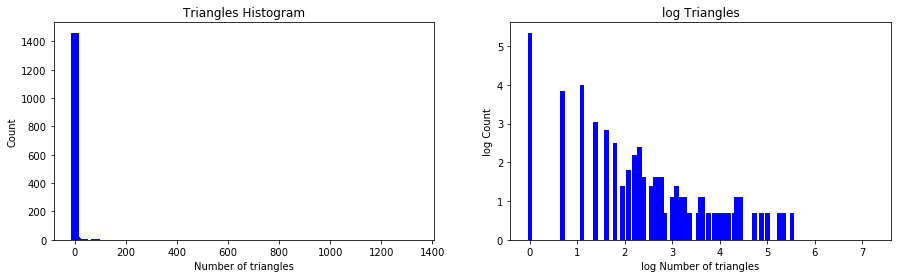

In [72]:
H = G.to_undirected()
triangles = nx.triangles(H)

lists = sorted(triangles.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

transitivity = nx.transitivity(H)
print("Transitivity: ", np.round(transitivity*100, 2), "%")

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x, y, '.')
plt.subplot(1,2,2)
plt.plot(y)
plt.show


h = {}
for node in triangles:
    d = triangles[node]
    if d in h:
        h[d] += 1
    else:
        h[d]=1

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(list(h.keys()), h.values(), width=30, color='b')
plt.title("Triangles Histogram")
plt.ylabel("Count")
plt.xlabel("Number of triangles")

plt.subplot(1,2,2)
plt.bar(np.log(list(h.keys())), np.log(list(h.values())), width=0.1, color='b')
plt.title("log Triangles")
plt.ylabel("log Count")
plt.xlabel("log Number of triangles")
plt.show()

## 3.2 Clustering

Average clustering:  0.19


C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\transforms.py:404: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


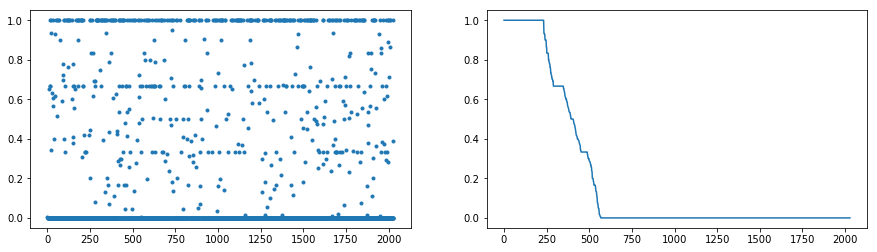

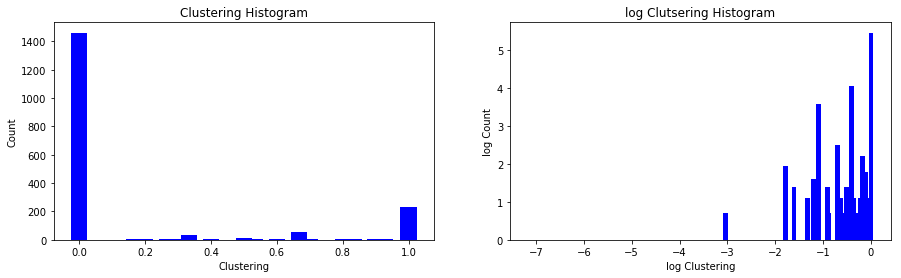

In [77]:
avg_clustering = nx.average_clustering(H)
clustering = nx.clustering(H)
print("Average clustering: ", np.round(avg_clustering,2))

lists = sorted(clustering.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x, y, '.')
plt.subplot(1,2,2)
plt.plot(y)
plt.show


h = {}
for node in clustering:
    d = clustering[node]
    if d in h:
        h[d] += 1
    else:
        h[d]=1

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(list(h.keys()), h.values(), width=0.05, color='b')
plt.title("Clustering Histogram")
plt.ylabel("Count")
plt.xlabel("Clustering")

plt.subplot(1,2,2)
plt.bar(np.log(list(h.keys())), np.log(list(h.values())), width=0.1, color='b')
plt.title("log Clutsering Histogram")
plt.ylabel("log Count")
plt.xlabel("log Clustering")
plt.show()

# 4. Distance measures

Connected components: 179

Largest connected component measures: 
Nodes:  1833
Edges:  4421
Center:  [452, 1158]
Diameter:  8
Periphery:  [53, 110, 114, 153, 188, 189, 259, 296, 377, 386, 401, 513, 561, 668, 732, 779, 983, 987, 1004, 1034, 1049, 1052, 1087, 1088, 1173, 1198, 1300, 1325, 1372, 1476, 1696, 1792, 1833, 1871, 1886, 1906, 1972, 1985, 2003]
Radius:  4
Eccentricity: 


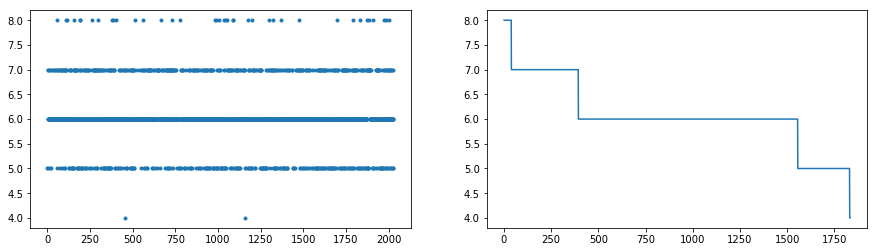

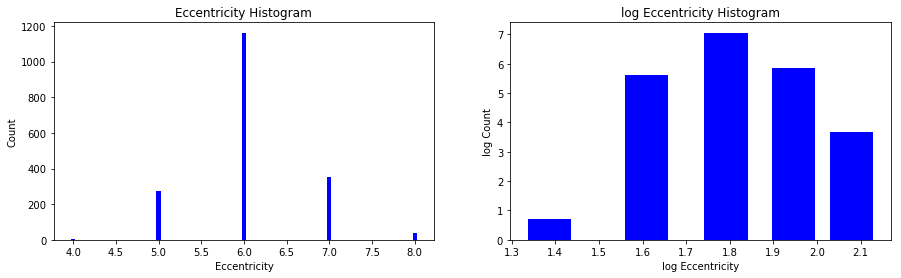

In [97]:
#center = nx.center(G) #unconnected graph
#diameter = nx.diameter(G) #unconnected graph
#eccentricity = nx.eccentricity(G) #unconnected graph
#periphery = nx.periphery(G) #unconnected graph
#radius = nx.radius(G) #unconnected graph
graphs = list(nx.connected_component_subgraphs(H))
print("Connected components:", len(graphs))

#We take the largest connected component to compute the distance measures
H_max = max(nx.connected_component_subgraphs(H), key=len)
print("\nLargest connected component measures: ")
print("Nodes: ", H_max.number_of_nodes())
print("Edges: ", H_max.number_of_edges())

center = nx.center(H_max)
diameter = nx.diameter(H_max)
eccentricity = nx.eccentricity(H_max)
periphery = nx.periphery(H_max)
radius = nx.radius(H_max)
print("Center: ", center)
print("Diameter: ", diameter)
#print("Eccentricity: ", eccentricity)
print("Periphery: ", periphery)
print("Radius: ", radius)
print("Eccentricity: ")
lists = sorted(eccentricity.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x, y, '.')
plt.subplot(1,2,2)
plt.plot(y)
plt.show


h = {}
for node in eccentricity:
    d = eccentricity[node]
    if d in h:
        h[d] += 1
    else:
        h[d]=1

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(list(h.keys()), h.values(), width=0.05, color='b')
plt.title("Eccentricity Histogram")
plt.ylabel("Count")
plt.xlabel("Eccentricity")

plt.subplot(1,2,2)
plt.bar(np.log(list(h.keys())), np.log(list(h.values())), width=0.1, color='b')
plt.title("log Eccentricity Histogram")
plt.ylabel("log Count")
plt.xlabel("log Eccentricity")
plt.show()

# 5. Degree distribution

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in log
C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\transforms.py:404: RuntimeWarning: invalid value encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)


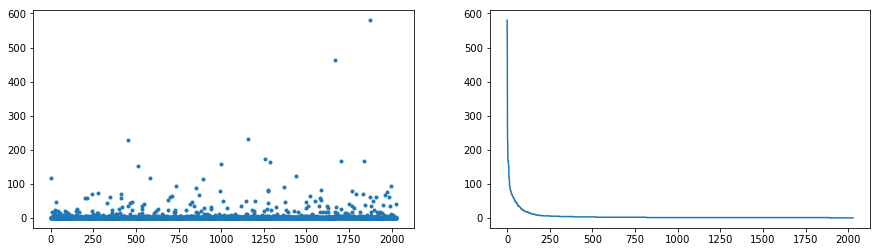

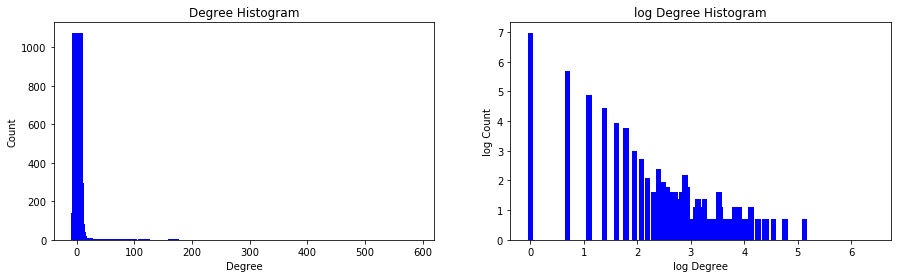

In [106]:
degree = nx.degree(G)

lists = sorted(degree.items(), key=lambda x: x[1], reverse=True) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.plot(x, y, '.')
plt.subplot(1,2,2)
plt.plot(y)
plt.show


h = {}
for node in degree:
    d = degree[node]
    if d in h:
        h[d] += 1
    else:
        h[d]=1

plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.bar(list(h.keys()), h.values(), width=20, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.subplot(1,2,2)
plt.bar(np.log(list(h.keys())), np.log(list(h.values())), width=0.1, color='b')
plt.title("log Degree Histogram")
plt.ylabel("log Count")
plt.xlabel("log Degree")
plt.show()